# Contents

importing libraries

dropping and renaming columns

remove outliers for percentages

coloured correlation heatmap

scatterplots

pairplots

historgram to create categorical plot

export data to start new script

# Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
path=r'/Users/vanessalimsingh/Achievement 6 June 2024'

In [4]:
df=pd.read_csv(os.path.join(path,'02 Data','Original Data','WHO_Respiratory_MortalityRate.csv'))

# dropping and renaming columns

In [7]:
df = df.drop(['Country Code', 'Age group code'], axis=1)

In [9]:
df=df.rename(columns={'No of Respiratory Deaths':'Respiratory Deaths', 'Country Name': 'Country'})

In [10]:
df=df.rename(columns={'Percentage of cause-specific deaths out of total deaths':'Percentage of total deaths'})

In [11]:
df=df.rename(columns={'Age-standardized death rate per 100 000 standard population':'Age-standardized death rate per 100 000'})

In [12]:
df=df.rename(columns={'Age-standardized death rate per 100 000 standard population':'Age-standardized death rate per 100 000'})

In [13]:
df.head()

,Region Code,Region Name,Country,Year,Sex,Age Group,Number,Percentage of total deaths,Age-standardized death rate per 100 000,Death rate per 100 000 population
0,EU,Europe,Albania,1987,All,[Unknown],0.0,NaN,NaN,NaN
1,EU,Europe,Albania,1987,Male,[All],311.0,3.227480,37.464405,19.631360
2,EU,Europe,Albania,1987,Male,[0],5.0,0.376506,NaN,11.820331
3,EU,Europe,Albania,1987,Male,[1-4],7.0,1.112878,NaN,4.691689
4,EU,Europe,Albania,1987,Male,[5-9],0.0,0.000000,NaN,0.000000


In [14]:
df=df.rename(columns={'Percentage of total deaths':'Percentage of resp deaths/total'})

In [15]:
df=df.rename(columns={'% Resp Deaths': 'Resp Deaths %'})

In [16]:
df=df.rename(columns={'% Resp Deaths': 'Resp Deaths %'})

In [17]:
df=df.rename(columns={'Age-standardized death rate per 100 000': 'AS_Death rate/100 000'})

In [18]:
df=df.rename(columns={'Death rate per 100 000 population': 'Death rate/100 000', 'Percentage of resp deaths/total':'Resp Deaths %','Number': 'Resp Deaths'})

In [20]:
#remove values that are over 66 % as these are highly skewed/outliers due to small total numbers of resp death.
df = df[df['Resp Deaths %'] < 66]

In [21]:
df.describe()

,Year,Resp Deaths,Resp Deaths %,AS_Death rate/100 000,Death rate/100 000
count,299397.000000,299397.000000,299397.000000,14316.000000,283307.000000
mean,1993.143228,516.048464,2.927566,29.029961,104.823697
std,18.273318,3421.453635,3.237333,18.911698,267.618145
min,1950.000000,0.000000,0.000000,0.000000,0.000000
25%,1980.000000,2.000000,0.904977,16.379664,0.996016
50%,1996.000000,15.000000,2.173913,24.548230,8.091993
75%,2008.000000,121.000000,4.033009,36.186668,65.112747
max,2022.000000,222951.000000,65.110712,180.404481,10000.000000


# Create a coloured correlation heatmap

In [22]:
df.dtypes

Region Code               object
Region Name               object
Country                   object
Year                       int64
Sex                       object
Age Group                 object
Resp Deaths              float64
Resp Deaths %            float64
AS_Death rate/100 000    float64
Death rate/100 000       float64
dtype: object

In [23]:
#drop objects

df2=df.drop(['Region Code','Region Name' , 'Country', 'Sex',], axis=1)

In [24]:
df2.head()

,Year,Age Group,Resp Deaths,Resp Deaths %,AS_Death rate/100 000,Death rate/100 000
1,1987,[All],311.0,3.227480,37.464405,19.631360
2,1987,[0],5.0,0.376506,NaN,11.820331
3,1987,[1-4],7.0,1.112878,NaN,4.691689
4,1987,[5-9],0.0,0.000000,NaN,0.000000
5,1987,[85+],92.0,4.132974,NaN,920.000000


In [25]:
#Recategorise age group to category
df2['Age Group'] = df2 ['Age Group'].astype('category')

In [26]:
df2['Age Group'].unique()

['[All]', '[0]', '[1-4]', '[5-9]', '[85+]', ..., '[25-29]', '[20-24]', '[15-19]', '[10-14]', '[Unknown]']
Length: 21
Categories (21, object): ['[0]', '[1-4]', '[10-14]', '[15-19]', ..., '[80-84]', '[85+]', '[All]', '[Unknown]']

In [27]:
#replace unknown values as NaN
df2['Age Group'] = df2['Age Group'].replace('[Unknown]', np.nan)

/var/folders/1g/ch7w9_k56pj78tjf9gzlt8zm0000gn/T/ipykernel_86018/3081877818.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df2['Age Group'] = df2['Age Group'].replace('[Unknown]', np.nan)


In [28]:
#check unique values in age group
unique_values_agegroup = set(df2['Age Group'])

In [29]:
print(unique_values_agegroup)

{'[30-34]', '[1-4]', '[5-9]', '[0]', '[70-74]', '[80-84]', '[15-19]', '[65-69]', '[35-39]', '[25-29]', '[All]', '[85+]', nan, '[60-64]', '[10-14]', '[55-59]', '[45-49]', '[20-24]', '[50-54]', '[75-79]', '[40-44]'}


In [30]:
#create an age group flag to categorise as float64
#Define the mapping dictionary

age_group_mapping = {
    '[0]': 0,
    '[1-4]': 1,
    '[5-9]': 2,
    '[10-14]': 3,
    '[15-19]': 4,
    '[20-24]': 5,
    '[25-29]': 6,
    '[30-34]': 7,
    '[35-39]': 8,
    '[40-44]': 9,
    '[45-49]': 10,
    '[50-54]': 11,
    '[55-59]': 12,
    '[60-64]': 13,
    '[65-69]': 14,
    '[70-74]': 15,
    '[75-79]': 16,
    '[80-84]': 17,
    '[85+]': 18,
}

In [31]:
# Map the 'Age Group' column to the new 'Age Group Flag' column
df2['Age Group Flag'] = df2['Age Group'].map(age_group_mapping)

In [32]:
# Get unique values in 'Age Group Flag' column, ensuring NaN is only shown once
unique_values_ageflag = df2['Age Group Flag'].dropna().unique()
unique_values_ageflag_with_nan = np.append(unique_values_ageflag, np.nan)

In [33]:
print(unique_values_ageflag)

[ 0.  1.  2. 18. 17. 16. 15. 14. 13. 12. 11. 10.  9.  8.  7.  6.  5.  4.
  3.]


In [34]:
print (unique_values_ageflag_with_nan)

[ 0.  1.  2. 18. 17. 16. 15. 14. 13. 12. 11. 10.  9.  8.  7.  6.  5.  4.
  3. nan]


In [35]:
df2.dtypes

Year                        int64
Age Group                category
Resp Deaths               float64
Resp Deaths %             float64
AS_Death rate/100 000     float64
Death rate/100 000        float64
Age Group Flag            float64
dtype: object

In [36]:
df2.head()

,Year,Age Group,Resp Deaths,Resp Deaths %,AS_Death rate/100 000,Death rate/100 000,Age Group Flag
1,1987,[All],311.0,3.227480,37.464405,19.631360,NaN
2,1987,[0],5.0,0.376506,NaN,11.820331,0.0
3,1987,[1-4],7.0,1.112878,NaN,4.691689,1.0
4,1987,[5-9],0.0,0.000000,NaN,0.000000,2.0
5,1987,[85+],92.0,4.132974,NaN,920.000000,18.0


In [37]:
# Create a subset excluding objects
sub = df2[[
    'Year','Resp Deaths', 'Resp Deaths %', 'Death rate/100 000','Age Group Flag' ]]

In [38]:
sub.head()

,Year,Resp Deaths,Resp Deaths %,Death rate/100 000,Age Group Flag
1,1987,311.0,3.227480,19.631360,NaN
2,1987,5.0,0.376506,11.820331,0.0
3,1987,7.0,1.112878,4.691689,1.0
4,1987,0.0,0.000000,0.000000,2.0
5,1987,92.0,4.132974,920.000000,18.0


In [39]:
# Create a correlation matrix using pandas
sub.corr()

,Year,Resp Deaths,Resp Deaths %,Death rate/100 000,Age Group Flag
Year,1.000000,0.031241,0.087366,-0.000608,0.002706
Resp Deaths,0.031241,1.000000,0.128798,0.081048,0.218007
Resp Deaths %,0.087366,0.128798,1.000000,0.449849,0.328566
Death rate/100 000,-0.000608,0.081048,0.449849,1.000000,0.523904
Age Group Flag,0.002706,0.218007,0.328566,0.523904,1.000000


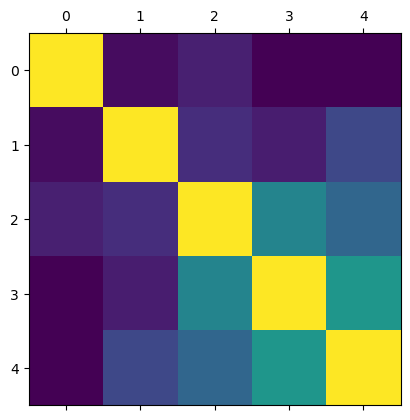

In [40]:
# Create a correlation heatmap using matplotlib
plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

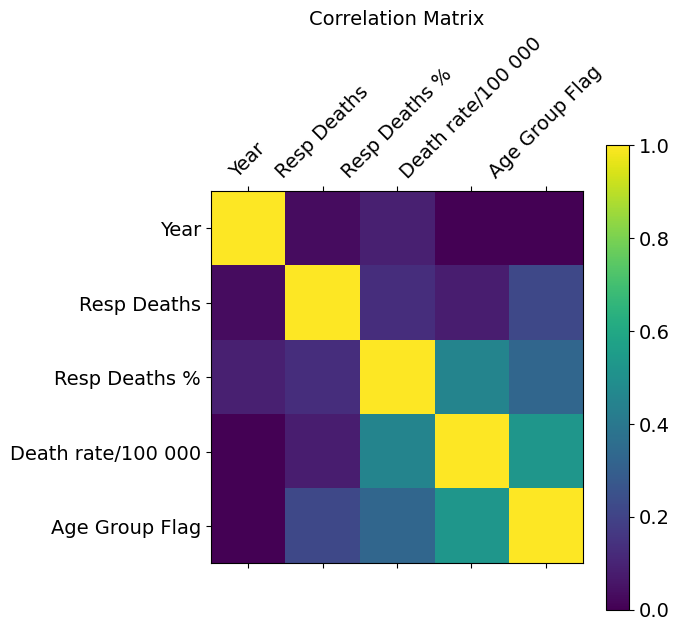

In [41]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(6, 6)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels

cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

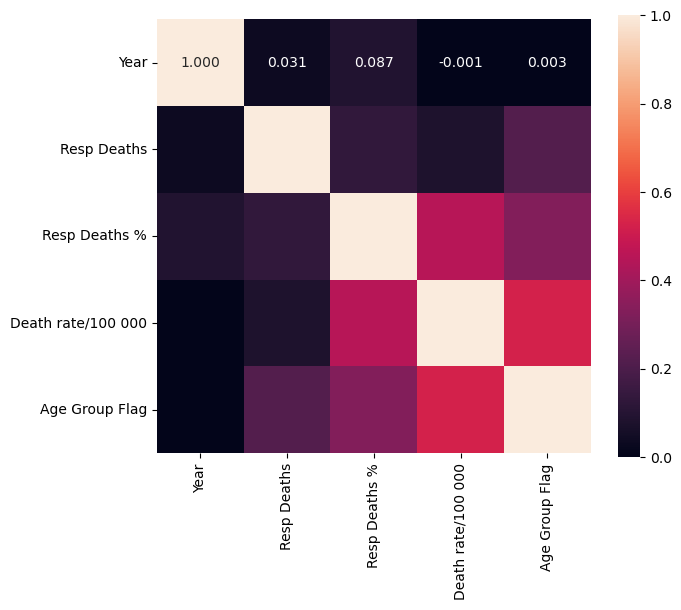

In [42]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(7,7))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, fmt=".3f", ax = ax, square=True, cbar_kws={"shrink": .82}) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

# Question: can't seem to display coorelation coefficient in every square 

# Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

## Moderate positive correlations:
#### Age group flag and total death rate/100,000: the higher the age group flag, the higher the total death rate/100,000 of the country. (higher age group flag = older). This is to be expected as deaths are typically more common in older age groups.

#### Age group flag and respiratory death percentage, as well as number of respiratory deaths: the higher the age group flag, the higher the percentage of respiratory death out of total death, as well as total respiratory deaths. This could mean older people are more susceptible to respiratory death.

#### Respiratory death percentage and total death rate per 100,000: the higher the respiratory death percentage of total deaths, the higher the total death rate/100,000. This makes sense as higher respiratory deaths would mean more total deaths. However, this could also mean other factors are also leading to a higher death rate in general, and not just respiratory deaths.


# Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

## Age group flag and total death rate/100,000

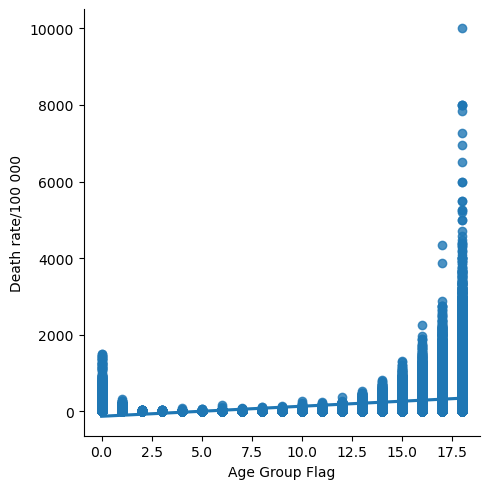

In [43]:
# Create a scatterplot for the "age group flag" and "total death rate/100,000" columns in seaborn
sns.lmplot(x = 'Age Group Flag', y = 'Death rate/100 000', data = sub)

## The scatter plot above shows death rates are higher for older age groups. this is to be expected. 

In [44]:
sub.head()

,Year,Resp Deaths,Resp Deaths %,Death rate/100 000,Age Group Flag
1,1987,311.0,3.227480,19.631360,NaN
2,1987,5.0,0.376506,11.820331,0.0
3,1987,7.0,1.112878,4.691689,1.0
4,1987,0.0,0.000000,0.000000,2.0
5,1987,92.0,4.132974,920.000000,18.0


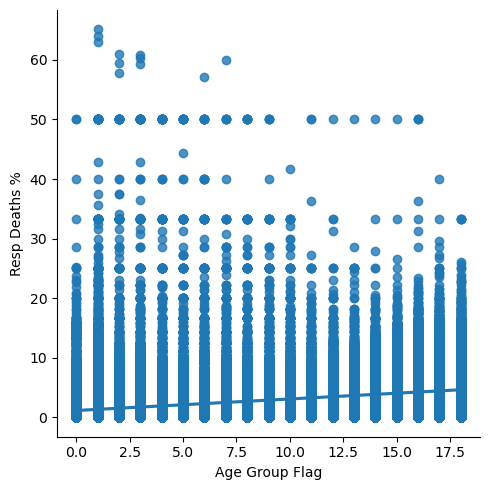

In [45]:
# Create a scatterplot for the "age group flag" and "Resp Deaths %" columns in seaborn
sns.lmplot(x = 'Age Group Flag', y = 'Resp Deaths %', data = sub)

## The scatter plot above shows that most percentages are below 30% across all age groups. However, there is no clear relationship between both variables. The outlier percentages (>65%) were removed due to an extremely small number of total deaths

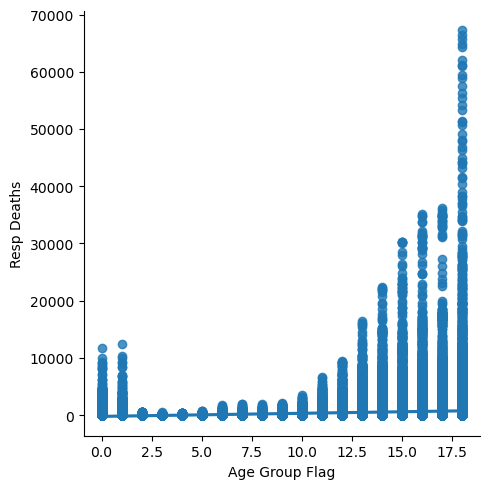

In [46]:
sns.lmplot(x = 'Age Group Flag', y = 'Resp Deaths', data = sub)

## The scatter plot above shows that higher age groups see higher numbers of respiratory deaths. This is to be expected. However, we can also see that very young age groups see  slightly higher respiratory deaths. Age flags 0 - 2 represents those aged 0 - 9 years old. 

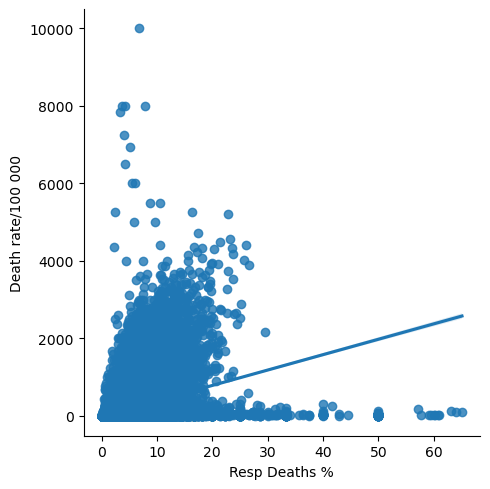

In [47]:
# Create a scatterplot for the "Resp Deaths %" and "Death rate/100 000" columns in seaborn
sns.lmplot(x = 'Resp Deaths %', y = 'Death rate/100 000', data = sub)

## The scatter plot above doesn't show a clear relationship between general death rates and respiratory death percentages. There are many causes of death that aren't related to respiratory diseases, and those causes of death could either increase or decrease. Therefore, it is inconclusive. Furthermore, we can see some values representing low respiratory death percentages but very high death rates, and vice versa. 

# Pair plots

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

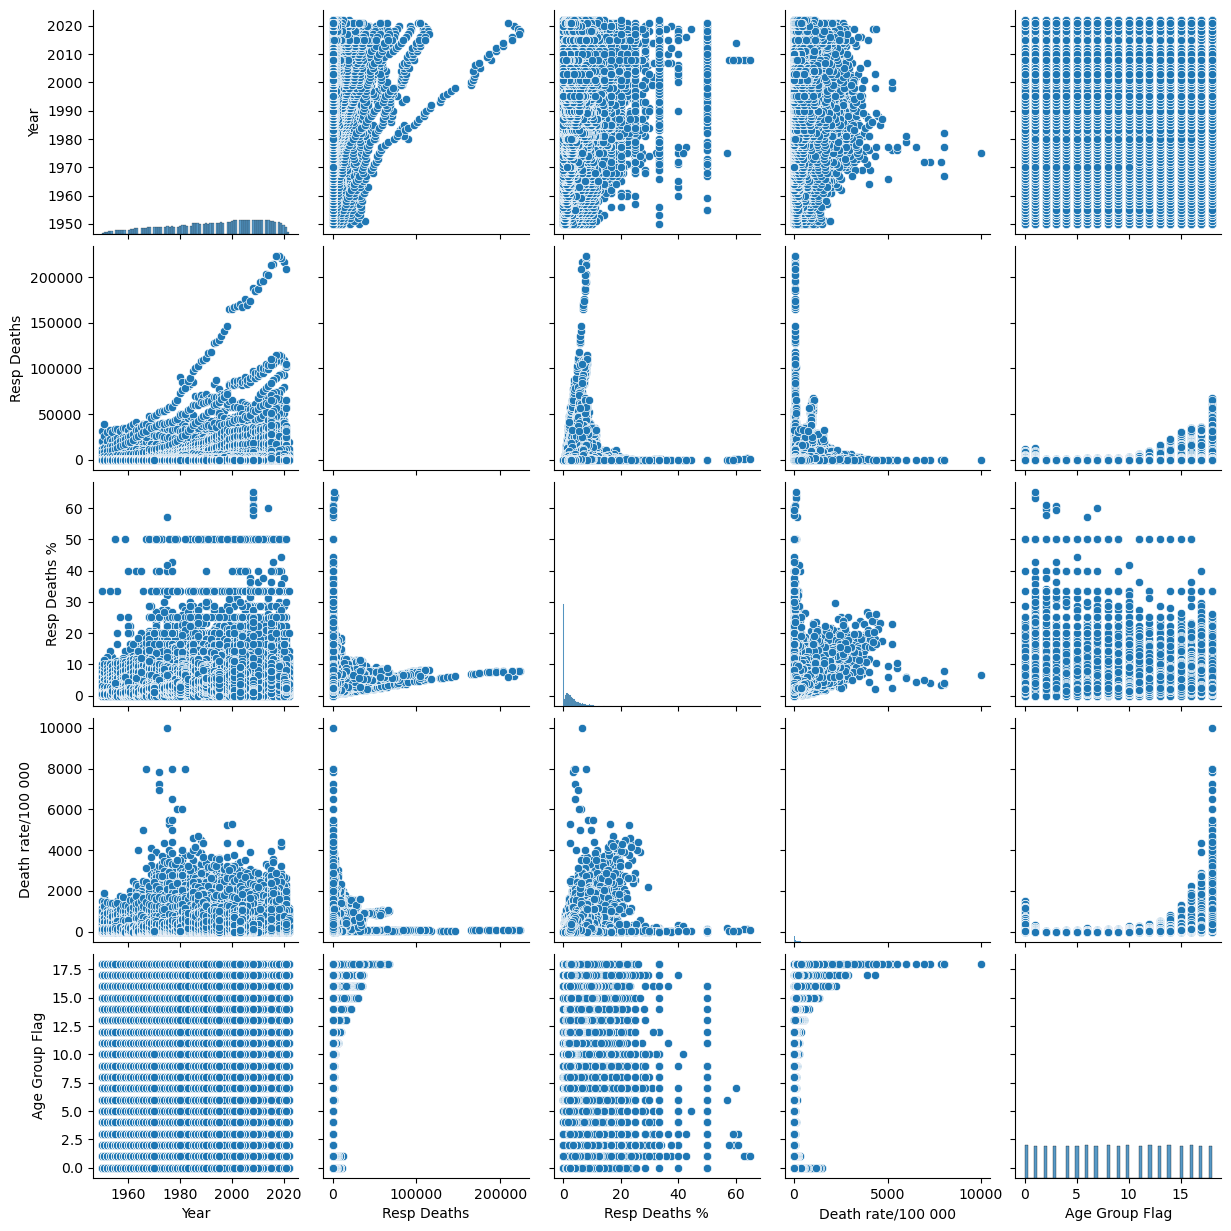

In [48]:
pairplot=sns.pairplot(sub)

## Respiratory death and respiratory death percentages are increasing over the years. 

# Categorical plots

In [49]:
#add age flag to main DF

#create an age group flag to categorise as float64
#Define the mapping dictionary

age_group_mapping_maindf = {
    '[0]': 0,
    '[1-4]': 1,
    '[5-9]': 2,
    '[10-14]': 3,
    '[15-19]': 4,
    '[20-24]': 5,
    '[25-29]': 6,
    '[30-34]': 7,
    '[35-39]': 8,
    '[40-44]': 9,
    '[45-49]': 10,
    '[50-54]': 11,
    '[55-59]': 12,
    '[60-64]': 13,
    '[65-69]': 14,
    '[70-74]': 15,
    '[75-79]': 16,
    '[80-84]': 17,
    '[85+]': 18,
}

In [50]:
# Map the 'Age Group' column to the new 'Age Group Flag' column on main DF
df['Age Group Flag'] = df['Age Group'].map(age_group_mapping_maindf)

In [51]:
# Get unique values in 'Age Group Flag' column, ensuring NaN is only shown once
unique_values_ageflag_df = df['Age Group Flag'].dropna().unique()
unique_values_ageflag_with_nan_df = np.append(unique_values_ageflag, np.nan)

In [52]:
unique_values_ageflag_with_nan_df

array([ 0.,  1.,  2., 18., 17., 16., 15., 14., 13., 12., 11., 10.,  9.,
        8.,  7.,  6.,  5.,  4.,  3., nan])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

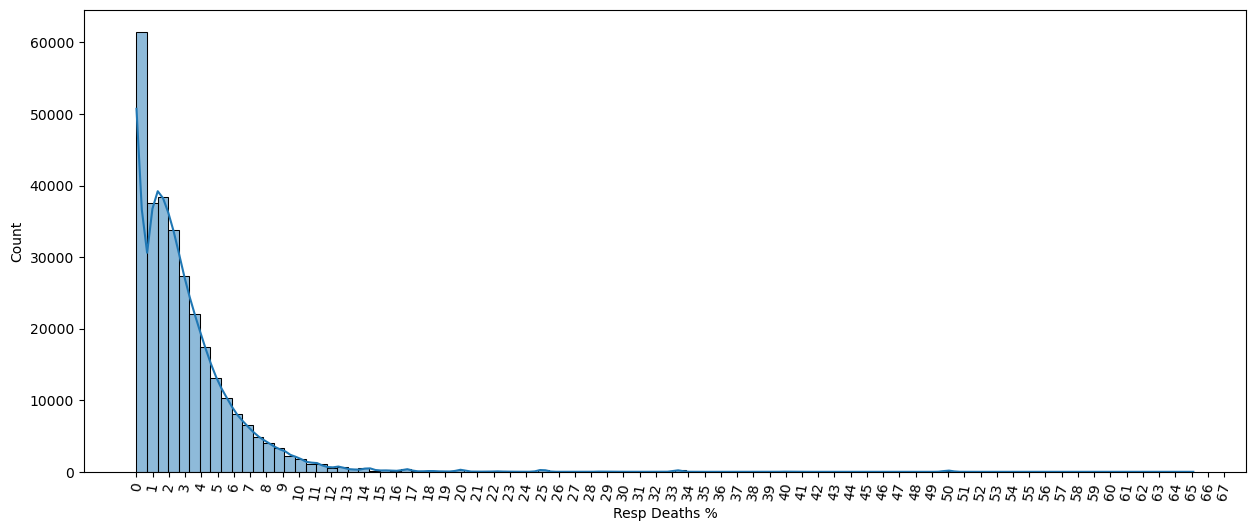

In [54]:
# Use a histogram to visualize the distribution of the variables. 

plt.figure(figsize=(15, 6))
sns.histplot(df['Resp Deaths %'], bins=100, kde=True)
plt.xticks(range(0, 68, 1),rotation=80)  # Ticks from 0 to 100 at intervals of 5
plt.show

In [55]:
df.loc[df['Resp Deaths %'] < 4.0, 'Resp Deaths % levels'] = 'Low levels'

In [56]:
df.loc[(df['Resp Deaths %'] >=4.0) & (df['Resp Deaths %']< 7) , 'Resp Deaths % levels'] = 'Medium levels'

In [57]:
df.loc[df['Resp Deaths %'] >=7.0, 'Resp Deaths % levels'] = 'High levels'

In [58]:
df['Resp Deaths % levels'].value_counts(dropna = False)

Resp Deaths % levels
Low levels       223274
Medium levels     51475
High levels       24648
Name: count, dtype: int64

In [ ]:
#export data
#starting new script due to size
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Who_Data.csv'))